In [5]:
import pickle

In [6]:
def extract_edges(edges):
    weights = list()
    for e in edges:
        weights.append(float(e[2]))
    return weights

In [7]:
cover_edges = pickle.load(open('./cover_edges_dev_web_courses_full.pickle', 'rb'))

In [9]:
weight_cover_edges = extract_edges(cover_edges)

0.09 0.1 0
0.1 0.2 500
0.2 0.3 133
0.3 0.4 62
0.4 0.5 28
0.5 1 31


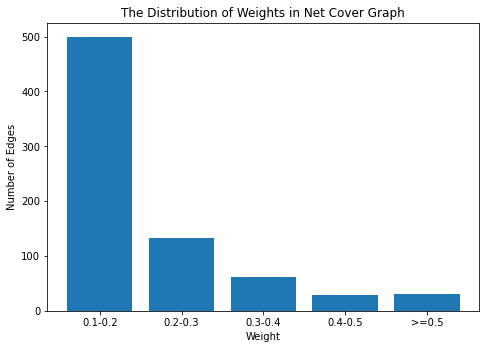

In [14]:
def draw_distribution_cover_graph(data):
    bins = list()    
    for i in range(1, 6, 1):
        cnt = 0
        if i == 1:
            for d in data:
                if d >= (0.09) and (d < (i / 10)):
                    cnt += 1
            print(0.09, i / 10, cnt)
        else:            
            for d in data:
                if d >= ((i - 1) / 10) and (d < (i / 10)):
                    cnt += 1
            print((i - 1) / 10, i / 10, cnt)
        bins.append(cnt)
    cnt = 0
    for d in data:
        if d >= (0.5):
            cnt += 1
    print(0.5, 1, cnt)
    bins.append(cnt)
    bins.pop(0) 
    return bins
y = draw_distribution_cover_graph(data=weight_cover_edges)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('The Distribution of Weights in Net Cover Graph')
plt.xlabel('Weight')
plt.ylabel('Number of Edges')
# plt.yscale('log')
x = ['0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '>=0.5']
ax.bar(x,y)
plt.show()

In [21]:
import pandas as pd 
def top_weighted_degree_using_weight(edges, options, top):
    root_node, dest_node, weight = list(), list(), list()
    for e in edges:
        root_node.append(e[0])
        dest_node.append(e[1])
        weight.append(float(e[2]))
    df = pd.DataFrame({'root': root_node, 'dest': dest_node, 'weight': weight})
    if options == 'indegree':
        return df.groupby(['dest'])['weight'].sum().reset_index(name='weight').sort_values(['weight'], ascending=False).head(top)
    elif options == 'outdegree':
        return df.groupby(['root'])['weight'].sum().reset_index(name='weight').sort_values(['weight'], ascending=False).head(top)

In [22]:
def num_concepts(cover_edges):
    concepts = list()
    for e in cover_edges:
        concepts.append(e[0])
        concepts.append(e[1])
    concepts = list(set(concepts))
    return len(concepts)

In [25]:
print(len(cover_edges))

754


In [23]:
top_weighted_degree_using_weight(edges=cover_edges, options='indegree', top=num_concepts(cover_edges)).shape

(105, 2)

In [24]:
top_weighted_degree_using_weight(edges=cover_edges, options='outdegree', top=num_concepts(cover_edges)).shape

(45, 2)

In [31]:
net_cover_concepts_indegree = list(top_weighted_degree_using_weight(edges=cover_edges, options='indegree', top=num_concepts(cover_edges))['dest'])
net_cover_concepts_outdegree = list(top_weighted_degree_using_weight(edges=cover_edges, options='outdegree', top=num_concepts(cover_edges))['root'])
intersect_net_cover_concepts_in_out = list(set(net_cover_concepts_indegree) & set(net_cover_concepts_outdegree))
for c in intersect_net_cover_concepts_in_out:
    print(c)
print(len(intersect_net_cover_concepts_in_out))

code,encoding
json
beginner's all-purpose symbolic instruction code basic,basic
jquery
php
,quark
j
blog,blogging software
websites,website
nodejs,node.js
bootstrap
google
website development,web development,web programming
c
rest,representational state transfer
django
ajax,afc ajax
mongodb
computer programming,programming
learning
html5
wordpress
html
security
mvc,model-view-controller
my sql,mysql
python programming,python
designing,designs,design
javascript
system,systat
30


In [35]:
order_edges = pickle.load(open('./order_edges_dev_web_courses_full.pickle', 'rb'))

0.09 0.1 0
0.1 0.2 500
0.2 0.3 133
0.3 0.4 62
0.4 0.5 28
0.5 1 31


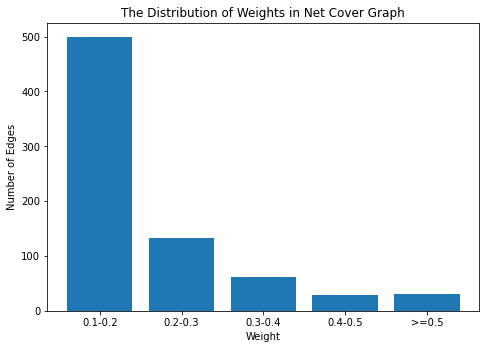

In [36]:
def draw_distribution_net_graph(data):
    bins = list()    
    for i in range(1, 6, 1):
        cnt = 0
        if i == 1:
            for d in data:
                if d >= 0.025 and d < 0.1:
                    cnt += 1
            print(0.025, i / 10, cnt)
        else:            
            for d in data:
                if d >= ((i - 1) / 10) and (d < (i / 10)):
                    cnt += 1
            print((i - 1) / 10, i / 10, cnt)
        bins.append(cnt)
    cnt = 0
    for d in data:
        if d >= (0.5):
            cnt += 1
    print(0.5, 1, cnt)
    bins.append(cnt)
#     bins.pop(0) 
    return bins
y = draw_distribution_cover_graph(data=weight_cover_edges)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('The Distribution of Weights in Net Cover Graph')
plt.xlabel('Weight')
plt.ylabel('Number of Edges')
# plt.yscale('log')
x = ['0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '>=0.5']
ax.bar(x,y)
plt.show()

In [40]:
weight_order_edges = extract_edges(order_edges)

[169, 21, 8, 9, 3]


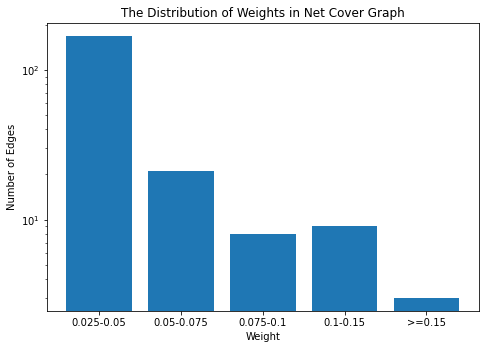

In [47]:
def draw_distribution_net_graph(data):
    bins = list()    
    cnt = 0
    for d in data:
        if d < 0.05:
            cnt += 1
    bins.append(cnt)
    
    cnt = 0
    for d in data:
        if d >= 0.05 and d < 0.075:
            cnt += 1
    bins.append(cnt)
    
    cnt = 0
    for d in data:
        if d >= 0.075 and d < 0.1:
            cnt += 1
    bins.append(cnt)
    
    cnt = 0
    for d in data:
        if d >= 0.1 and d < 0.15:
            cnt += 1
    bins.append(cnt)
    
    cnt = 0
    for d in data:
        if d >= 0.15:
            cnt += 1
    bins.append(cnt)
    
    return bins
y = draw_distribution_net_graph(data=weight_order_edges)

print(y)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('The Distribution of Weights in Net Cover Graph')
plt.xlabel('Weight')
plt.ylabel('Number of Edges')
plt.yscale('log')
x = ['0.025-0.05', '0.05-0.075', '0.075-0.1', '0.1-0.15', '>=0.15']
ax.bar(x,y)
plt.show()

In [51]:
len(order_edges)

210

In [48]:
top_weighted_degree_using_weight(edges=order_edges, options='indegree', top=num_concepts(order_edges)).shape

(34, 2)

In [49]:
top_weighted_degree_using_weight(edges=order_edges, options='outdegree', top=num_concepts(order_edges)).shape

(79, 2)

In [50]:
net_cover_concepts_indegree = list(top_weighted_degree_using_weight(edges=order_edges, options='indegree', top=num_concepts(order_edges))['dest'])
net_cover_concepts_outdegree = list(top_weighted_degree_using_weight(edges=order_edges, options='outdegree', top=num_concepts(order_edges))['root'])
intersect_net_cover_concepts_in_out = list(set(net_cover_concepts_indegree) & set(net_cover_concepts_outdegree))
for c in intersect_net_cover_concepts_in_out:
    print(c)
print(len(intersect_net_cover_concepts_in_out))

code,encoding
json
beginner's all-purpose symbolic instruction code basic,basic
process,operating system process control software
file,flat file checker
php
,quark
j
websites,website
bootstrap
patternmaking software,pattern
via information tools man-it,tool
software libraries,library
structure,load-bearing analysis software
c
database development,database management database systems,database,database management software
django
lecturing,lecture
video
reviews,review
system,systat
image
html
apple pages for mac,pages
python programming,python
writing
designing,designs,design
javascript
learning
after the deadline,after
30
